<a href="https://colab.research.google.com/github/paulopetrillo/FIAP_TECH_CHALENGE_01/blob/funcao/Tech_Challenge_funcao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#!pip install yfinance

In [18]:
# Carrega/importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
import matplotlib

import warnings
warnings.filterwarnings('ignore')


# carrega bilbioteca yfinance (sugerida pelo Prof. Daniel Lima) para carregar
# automaticamente os dados da BVSP (https://br.investing.com/indices/bovespa-historical-data)
import yfinance as yf

print('Versão do pandas => %s' % pd.__version__)
print('Versão do numpy => %s' % np.__version__)
print('Versão do matplotlib => %s' % matplotlib.__version__)
print('Versão do seaborn => %s' % sns.__version__ )
print('Versão do yfinance => %s' % yf.__version__ )



# "^BVSP" parametro para pegar a cotação da BVSP (Ibovespa (IBOV))
dados = yf.Ticker("^BVSP")

Versão do pandas => 2.2.2
Versão do numpy => 2.0.2
Versão do matplotlib => 3.10.0
Versão do seaborn => 0.13.2
Versão do yfinance => 0.2.65


In [19]:
# paranmetros completos para dowload dos dados da BVSP.
# Conforme: https://ranaroussi.github.io/yfinance/
dados = yf.Ticker("^BVSP")
dados.info
dados.calendar
dados.analyst_price_targets
dados.quarterly_income_stmt
# dados.history(start='2022-01-01', end='2025-07-19')
# dat.history(period='3y')
# dat.option_chain(dat.options[4]).calls

ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 


""


In [20]:
# Atribuinda os dados a variável dados.
# dados = dados.history(period="max")
# dados = dados.history(start="2000-01-01", end="2025-08-10")
dados = dados.history(period='10y')


# transforma dados em um Dataframe.
dados = pd.DataFrame(dados)

# verificando os tipos de cada coluna.
dados.info()

# Observação:
# A coluna "close" dos dados baixados refere-se a coluna "Último"
# dos dados do site "https://br.investing.com/indices/bovespa-historical-data".

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2481 entries, 2015-08-21 00:00:00-03:00 to 2025-08-21 00:00:00-03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2481 non-null   float64
 1   High          2481 non-null   float64
 2   Low           2481 non-null   float64
 3   Close         2481 non-null   float64
 4   Volume        2481 non-null   int64  
 5   Dividends     2481 non-null   float64
 6   Stock Splits  2481 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 155.1 KB


In [21]:
# Observação 1:
# Campos "Dividends" e "Stock Splits" não tem dados, portanto podem ser retirados.

# Retirando as colunas  "Dividends" e "Stock Splits"
dados = dados.drop(labels=['Dividends', 'Stock Splits'], axis=1)
dados.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-08-21 00:00:00-03:00,46649.0,46649.0,45677.0,45720.0,2869600
2015-08-24 00:00:00-03:00,45715.0,45715.0,42749.0,44336.0,4727700
2015-08-25 00:00:00-03:00,44338.0,45588.0,44338.0,44545.0,3726600
2015-08-26 00:00:00-03:00,44546.0,46039.0,44540.0,46038.0,3739600
2015-08-27 00:00:00-03:00,46038.0,47997.0,46038.0,47715.0,4252000


In [22]:
from sqlite3 import Timestamp
from os import times_result
# Vamos criar uma coluna com os dados do indice do tipo data.

# Importa biblioteca para tratar datas
from datetime import datetime

# Cria coluna com as datas.
dados['Data'] = dados.index

# Formata para dia.mês.ano (o método "".dt.date" deixa o campo com tipo object).
dados['Data'] = pd.to_datetime(dados['Data'], format='%d-%m-%Y').dt.date

# Define o indice do Data-Frame com a Data (facilita na busca por datas).
dados.index = pd.to_datetime(dados.Data, format='%d-%m-%Y')
# dados.index = pd.to_datetime(dados.index, format='%d-%m-%Y') ##<<< bastaria nesta celula

# Transforma o tipo da coluna "Data" de 'Object' para 'datetime64'.
dados['Data'] = pd.to_datetime(dados['Data'], format='%d-%m-%Y')

# Informações dos dados (quantidade e tipo de dados).
dados.info()
dados.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2481 entries, 2015-08-21 to 2025-08-21
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    2481 non-null   float64       
 1   High    2481 non-null   float64       
 2   Low     2481 non-null   float64       
 3   Close   2481 non-null   float64       
 4   Volume  2481 non-null   int64         
 5   Data    2481 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 135.7 KB


,Open,High,Low,Close,Volume,Data
Data,,,,,,
2015-08-21,46649.0,46649.0,45677.0,45720.0,2869600,2015-08-21
2015-08-24,45715.0,45715.0,42749.0,44336.0,4727700,2015-08-24
2015-08-25,44338.0,45588.0,44338.0,44545.0,3726600,2015-08-25
2015-08-26,44546.0,46039.0,44540.0,46038.0,3739600,2015-08-26
2015-08-27,46038.0,47997.0,46038.0,47715.0,4252000,2015-08-27


In [23]:
# Alterando a ordem das colunas, apenas para ficar na mesma sequência que o site.
dados = dados[['Close', 'Open', 'High', 'Low', 'Volume', 'Data']]
dados.head()

,Close,Open,High,Low,Volume,Data
Data,,,,,,
2015-08-21,45720.0,46649.0,46649.0,45677.0,2869600,2015-08-21
2015-08-24,44336.0,45715.0,45715.0,42749.0,4727700,2015-08-24
2015-08-25,44545.0,44338.0,45588.0,44338.0,3726600,2015-08-25
2015-08-26,46038.0,44546.0,46039.0,44540.0,3739600,2015-08-26
2015-08-27,47715.0,46038.0,47997.0,46038.0,4252000,2015-08-27


In [24]:
# Renomei as colunas conforme dados da BVSP.
dados.rename(columns={'Close':'Ultimo',
                      'Open':'Abertura',
                      'High':'Maxima',
                      'Low':'Minima'},inplace=True)
dados.info()
dados.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2481 entries, 2015-08-21 to 2025-08-21
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ultimo    2481 non-null   float64       
 1   Abertura  2481 non-null   float64       
 2   Maxima    2481 non-null   float64       
 3   Minima    2481 non-null   float64       
 4   Volume    2481 non-null   int64         
 5   Data      2481 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 135.7 KB


,Ultimo,Abertura,Maxima,Minima,Volume,Data
Data,,,,,,
2025-08-15,136341.0,136354.0,136431.0,135583.0,9291000,2025-08-15
2025-08-18,137322.0,136341.0,137902.0,136341.0,8089900,2025-08-18
2025-08-19,134432.0,137321.0,137321.0,133997.0,8684100,2025-08-19
2025-08-20,134667.0,134431.0,134964.0,134122.0,6845000,2025-08-20
2025-08-21,134511.0,134664.0,134837.0,133874.0,6516300,2025-08-21


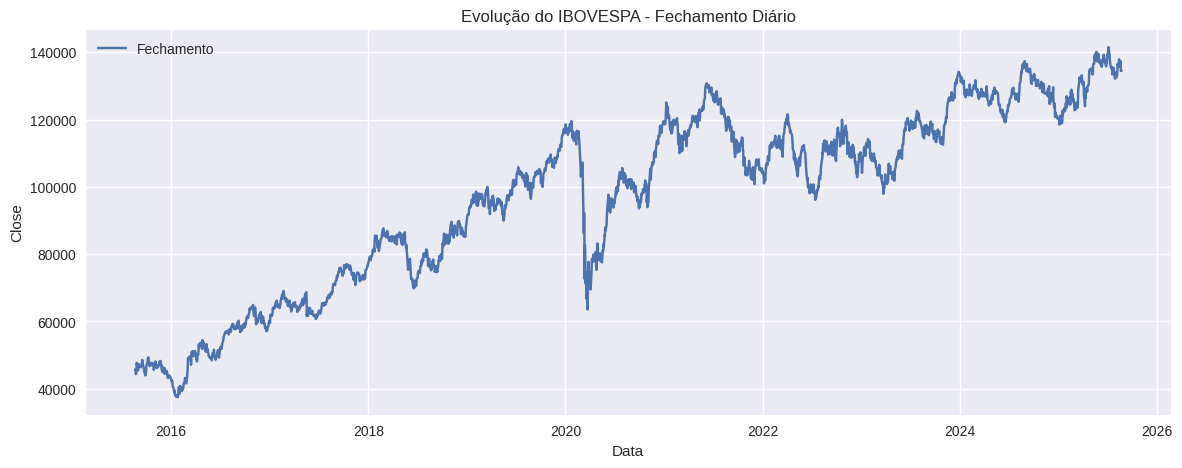

In [25]:
# Plotando os resultados do Valor de fechamento da bolsa (campo chamado "Último").
#plt.plot(dados.index, dados['Ultimo'])
#plt.plot(dados.Data, dados['Último'])


# Plot fechamento
plt.figure(figsize=(14, 5))
plt.plot(dados['Data'], dados['Ultimo'], label='Fechamento')
plt.title('Evolução do IBOVESPA - Fechamento Diário')
plt.xlabel('Data')
plt.ylabel('Close')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
# Possibilidades
# resultados = seasonal_decompose(dados['Ultimo'], model='additive', period=250) # 1 ano
# resultados = seasonal_decompose(dados['Ultimo'], model='additive', period=120) # 6 mese
# resultados = seasonal_decompose(dados['Ultimo'], model='additive', period=40) # 2 meses
resultados = seasonal_decompose(dados['Ultimo'], model='additive', period=20) # 1 mês
print(resultados.observed.head())
print(resultados.trend.head())
print(resultados.seasonal.head())
print(resultados.resid.head())

Data
2015-08-21    45720.0
2015-08-24    44336.0
2015-08-25    44545.0
2015-08-26    46038.0
2015-08-27    47715.0
Name: Ultimo, dtype: float64
Data
2015-08-21   NaN
2015-08-24   NaN
2015-08-25   NaN
2015-08-26   NaN
2015-08-27   NaN
Name: trend, dtype: float64
Data
2015-08-21    119.986562
2015-08-24    -14.798194
2015-08-25   -207.513032
2015-08-26   -281.906528
2015-08-27   -248.657747
Name: seasonal, dtype: float64
Data
2015-08-21   NaN
2015-08-24   NaN
2015-08-25   NaN
2015-08-26   NaN
2015-08-27   NaN
Name: resid, dtype: float64


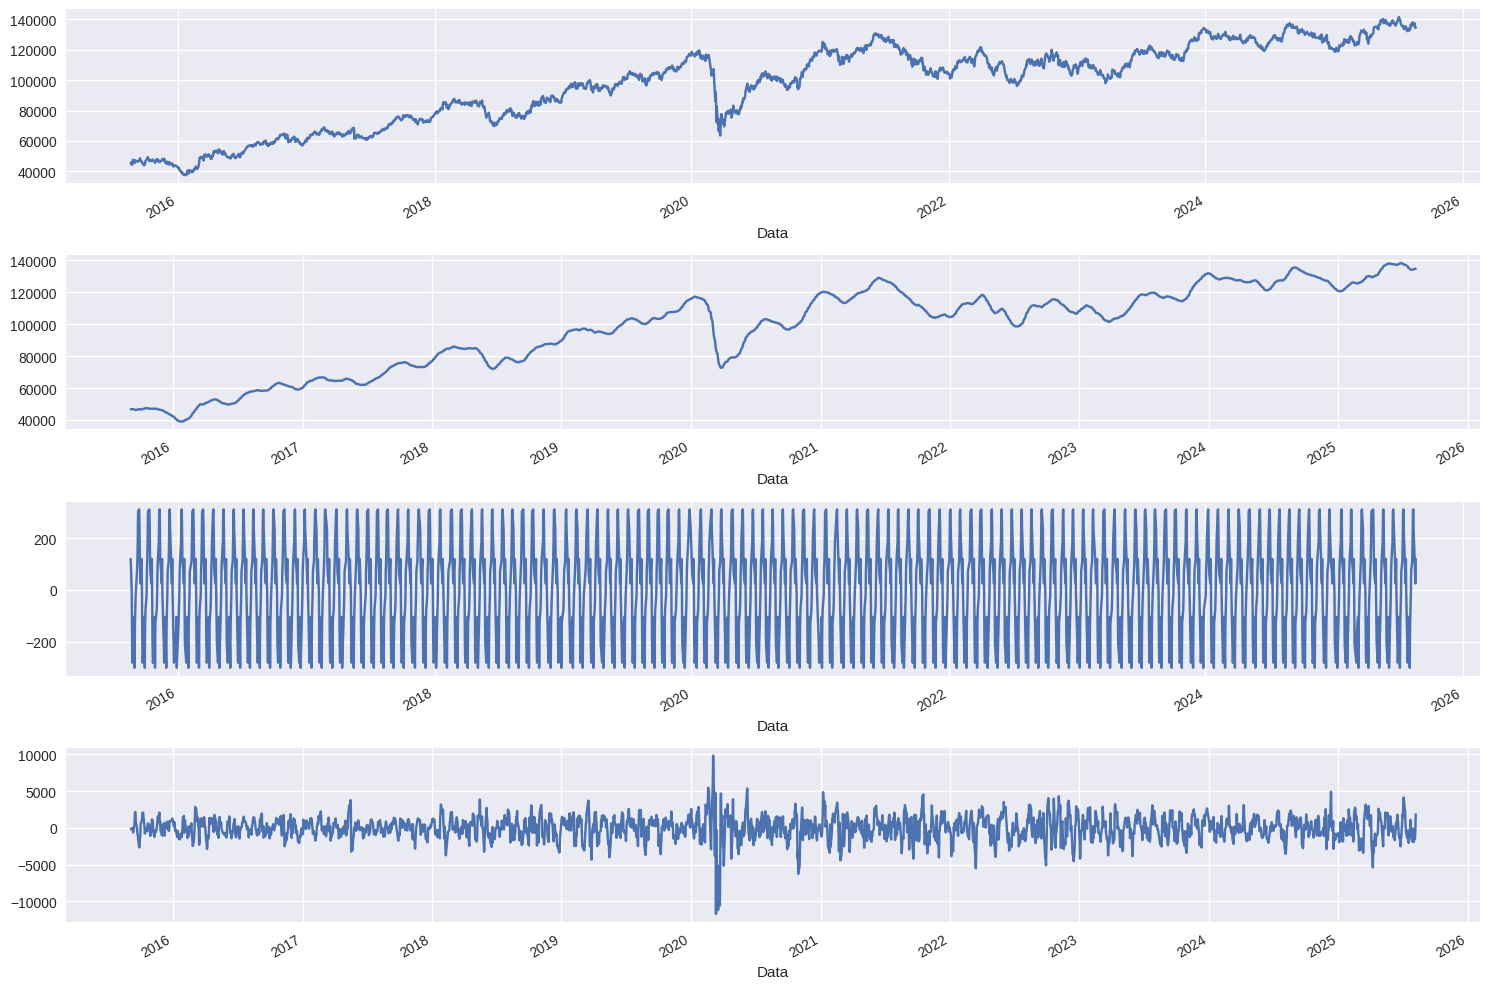

In [27]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Configuração do estilo dos gráficos
plt.style.use('seaborn-v0_8')

# # 1. Criar uma série temporal sintética (ou carregar seus dados)
# def criar_serie_temporal():
#     """Cria uma série temporal sintética para demonstração"""
#     np.random.seed(42)
#     n = 200
#     tempo = pd.date_range(start='2020-01-01', periods=n, freq='D')

#     # Componente trend
#     trend = 0.05 * np.arange(n)

#     # Componente sazonal
#     seasonal = 10 * np.sin(2 * np.pi * np.arange(n) / 30)

#     # Componente autoregressiva
#     ar_component = np.zeros(n)
#     ar_component[0] = 0
#     for t in range(1, n):
#         ar_component[t] = 0.7 * ar_component[t-1] + np.random.normal(0, 2)

# Série completa
serie = dados['Ultimo']

#    return pd.Series(serie, index=tempo, name='valor')

# 2. Teste de estacionariedade
def testar_estacionariedade(serie):
    """Testa se a série temporal é estacionária"""
    resultado = adfuller(serie)
    print('Teste de Dickey-Fuller Aumentado:')
    print(f'Estatística ADF: {resultado[0]:.4f}')
    print(f'p-valor: {resultado[1]:.4f}')
    print('Valores críticos:')
    for key, value in resultado[4].items():
        print(f'   {key}: {value:.4f}')

    if resultado[1] <= 0.05:
        print("A série é estacionária (rejeita H0)")
        return True
    else:
        print("A série não é estacionária (não rejeita H0)")
        return False

# 3. Função para treinar e avaliar o modelo ARIMA
def modelo_arima_predicao(serie, ordem=(2,1,2), train_size=0.8):
    """Treina e avalia um modelo ARIMA"""

    # Dividir em treino e teste
    split_idx = int(len(serie) * train_size)
    train = serie[:split_idx]
    test = serie[split_idx:]

    print(f"Tamanho do treino: {len(train)}")
    print(f"Tamanho do teste: {len(test)}")

    # Treinar o modelo ARIMA
    modelo = ARIMA(train, order=ordem)
    modelo_ajustado = modelo.fit()

    print("\nResumo do modelo:")
    print(modelo_ajustado.summary())

    # Fazer previsões
    previsoes = modelo_ajustado.forecast(steps=len(test))

    # Calcular métricas de erro
    mse = mean_squared_error(test, previsoes)
    mae = mean_absolute_error(test, previsoes)
    rmse = np.sqrt(mse)

    print(f"\nMétricas de desempenho:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

    return modelo_ajustado, previsoes, train, test

# 4. Visualização dos resultados
def plotar_resultados(serie, train, test, previsoes):
    """Plota os resultados das previsões"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Série temporal completa
    axes[0, 0].plot(serie, label='Série Original', alpha=0.7)
    axes[0, 0].set_title('Série Temporal Completa')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Treino vs Teste
    axes[0, 1].plot(train.index, train, label='Treino', color='blue')
    axes[0, 1].plot(test.index, test, label='Teste Real', color='green')
    axes[0, 1].plot(test.index, previsoes, label='Previsões', color='red', linestyle='--')
    axes[0, 1].set_title('Previsões vs Valores Reais')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Resíduos
    # Align indices before calculating residuals
    residuos = test - previsoes.set_axis(test.index)
    axes[1, 0].plot(residuos.index, residuos, color='purple')
    axes[1, 0].axhline(y=0, color='r', linestyle='--')
    axes[1, 0].set_title('Resíduos das Previsões')
    axes[1, 0].grid(True, alpha=0.3)

    # Histograma dos resíduos
    axes[1, 1].hist(residuos, bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[1, 1].axvline(x=0, color='r', linestyle='--')
    axes[1, 1].set_title('Distribuição dos Resíduos')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# 5. Função para previsão futura
def previsao_futura(modelo, steps=30):
    """Faz previsões para períodos futuros"""
    previsao_futura = modelo.forecast(steps=steps)
    intervalo_confianca = modelo.get_forecast(steps=steps).conf_int()

    plt.figure(figsize=(12, 6))
    plt.plot(previsao_futura.index, previsao_futura, label='Previsão Futura', color='red', linewidth=2)
    plt.fill_between(previsao_futura.index,
                    intervalo_confianca.iloc[:, 0],
                    intervalo_confianca.iloc[:, 1],
                    color='red', alpha=0.2, label='Intervalo de Confiança 95%')
    plt.title(f'Previsão para os próximos {steps} períodos')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return previsao_futura


TESTE DE ESTACIONARIEDADE
Teste de Dickey-Fuller Aumentado:
Estatística ADF: -1.6700
p-valor: 0.4467
Valores críticos:
   1%: -3.4330
   5%: -2.8627
   10%: -2.5674
A série não é estacionária (não rejeita H0)

Aplicando diferenciação para tornar a série estacionária...
Teste de Dickey-Fuller Aumentado:
Estatística ADF: -17.4778
p-valor: 0.0000
Valores críticos:
   1%: -3.4330
   5%: -2.8627
   10%: -2.5674
A série é estacionária (rejeita H0)

TREINAMENTO DO MODELO ARIMA
Tamanho do treino: 1984
Tamanho do teste: 497

Resumo do modelo:
                               SARIMAX Results                                
Dep. Variable:                 Ultimo   No. Observations:                 1984
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -17157.882
Date:                Fri, 22 Aug 2025   AIC                          34325.764
Time:                        07:14:16   BIC                          34353.726
Sample:                             0   HQIC                    

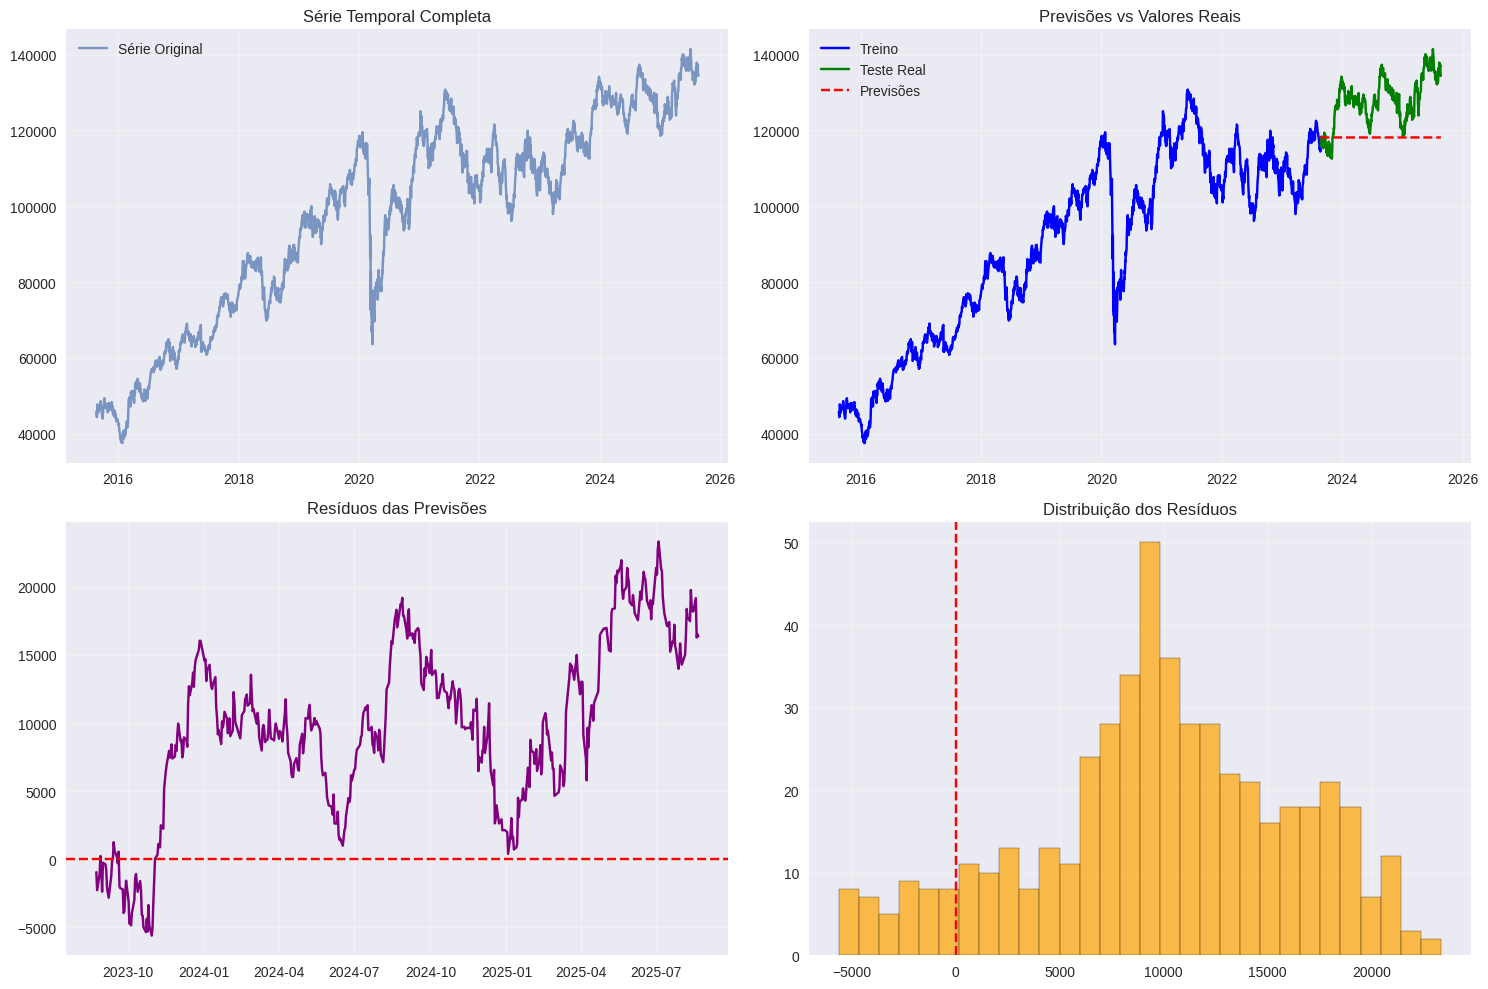


PREVISÃO FUTURA


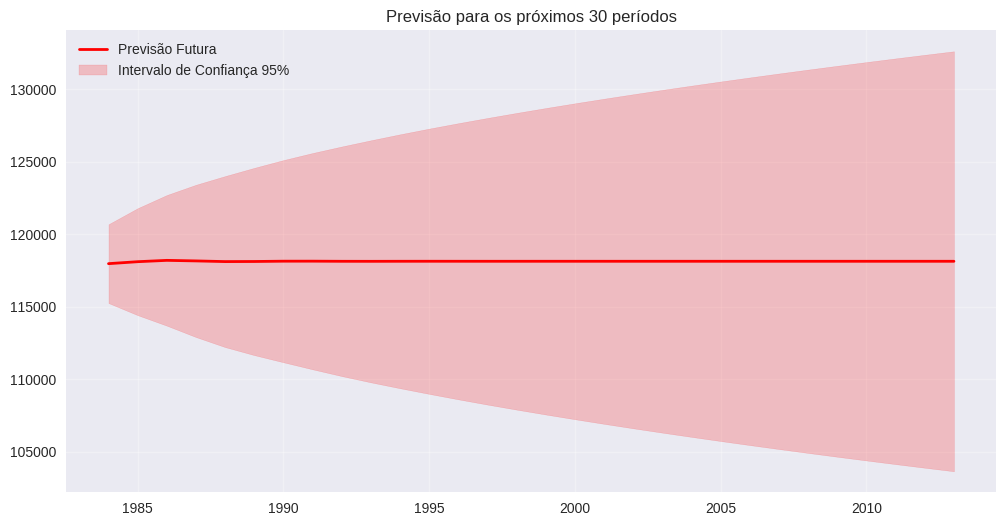


Previsões futuras (primeiros 10 valores):
1984    117980.127372
1985    118115.590379
1986    118208.048006
1987    118169.478228
1988    118122.764325
1989    118129.657553
1990    118150.734117
1991    118152.054458
1992    118143.433488
1993    118141.148080
Name: predicted_mean, dtype: float64


In [29]:
# Execução principal
if __name__ == "__main__":
    # Criar série temporal
    # serie =
    serie = dados['Ultimo']

    # Testar estacionariedade
    print("\n" + "="*50)
    print("TESTE DE ESTACIONARIEDADE")
    print("="*50)
    estacionaria = testar_estacionariedade(serie)

    # Se não for estacionária, aplicar diferenciação
    if not estacionaria:
        print("\nAplicando diferenciação para tornar a série estacionária...")
        serie_diff = serie.diff().dropna()
        estacionaria_diff = testar_estacionariedade(serie_diff)

    # Treinar modelo ARIMA
    print("\n" + "="*50)
    print("TREINAMENTO DO MODELO ARIMA")
    print("="*50)

    # Ordem do modelo: (p, d, q) = (AR, Integração, MA)
    modelo_ajustado, previsoes, train, test = modelo_arima_predicao(
        serie, ordem=(2, 1, 2), train_size=0.8
    )

    # Plotar resultados
    print("\n" + "="*50)
    print("VISUALIZAÇÃO DOS RESULTADOS")
    print("="*50)
    plotar_resultados(serie, train, test, previsoes)

    # Previsão futura
    print("\n" + "="*50)
    print("PREVISÃO FUTURA")
    print("="*50)
    previsoes_futuras = previsao_futura(modelo_ajustado, steps=30)

    print("\nPrevisões futuras (primeiros 10 valores):")
    print(previsoes_futuras.head(10))


TESTE DE ESTACIONARIEDADE
Teste de Dickey-Fuller Aumentado:
Estatística ADF: -1.6700
p-valor: 0.4467
Valores críticos:
   1%: -3.4330
   5%: -2.8627
   10%: -2.5674
A série não é estacionária (não rejeita H0)

Aplicando diferenciação para tornar a série estacionária...
Teste de Dickey-Fuller Aumentado:
Estatística ADF: -17.4778
p-valor: 0.0000
Valores críticos:
   1%: -3.4330
   5%: -2.8627
   10%: -2.5674
A série é estacionária (rejeita H0)

TREINAMENTO DO MODELO ARIMA
Tamanho do treino: 1984
Tamanho do teste: 497

Resumo do modelo:
                               SARIMAX Results                                
Dep. Variable:                 Ultimo   No. Observations:                 1984
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -17157.882
Date:                Fri, 22 Aug 2025   AIC                          34325.764
Time:                        07:14:18   BIC                          34353.726
Sample:                             0   HQIC                    

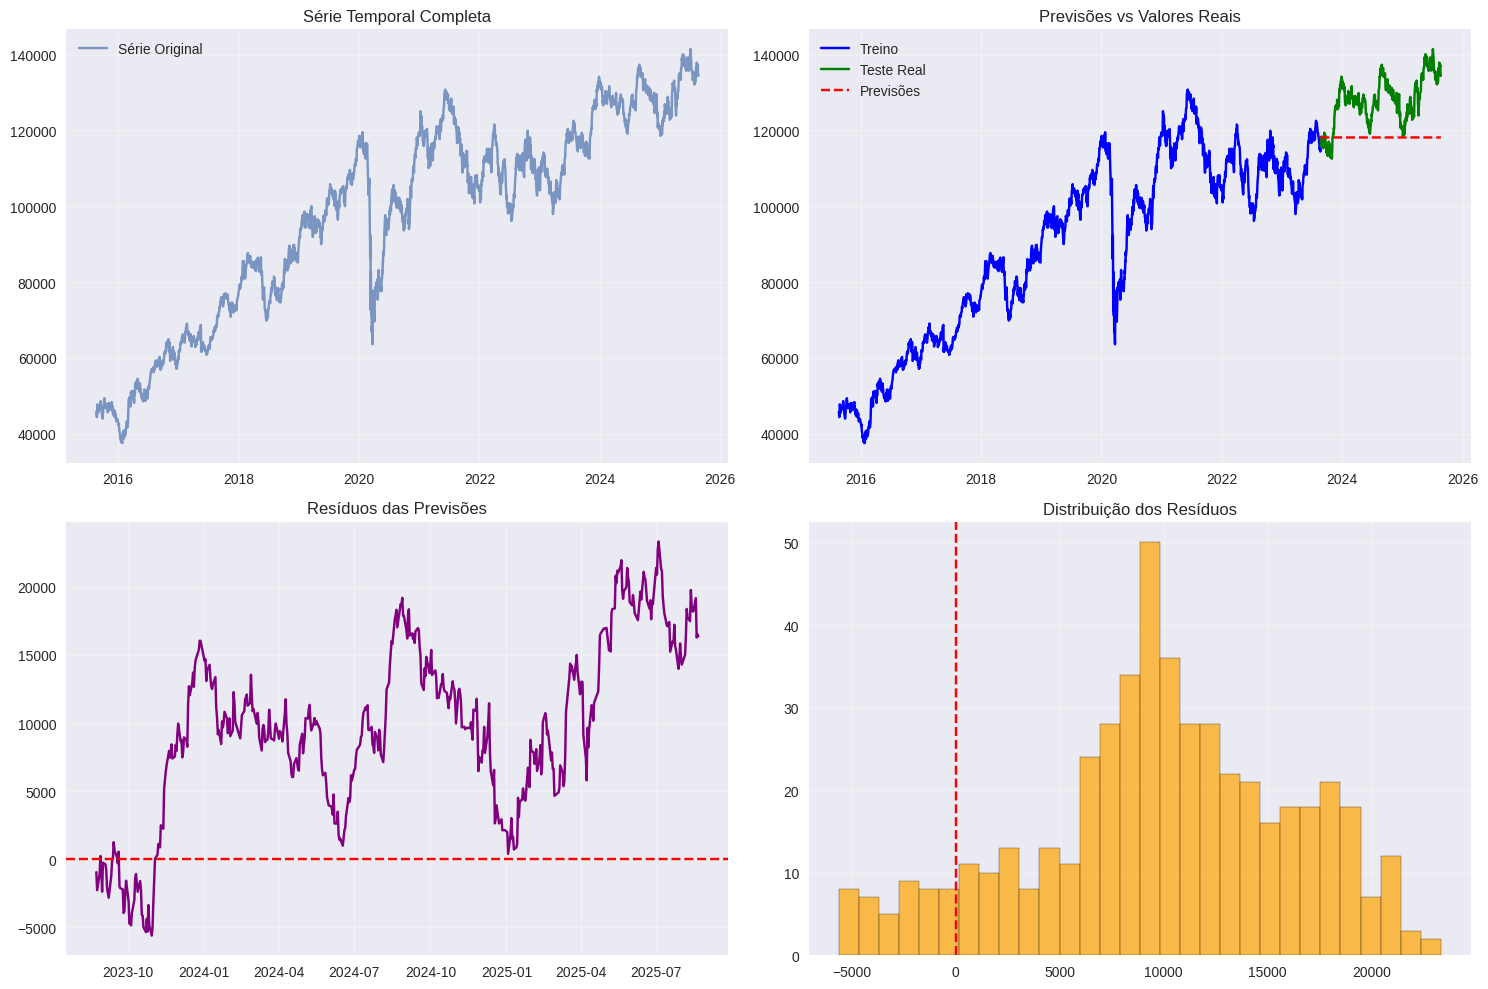


PREVISÃO FUTURA


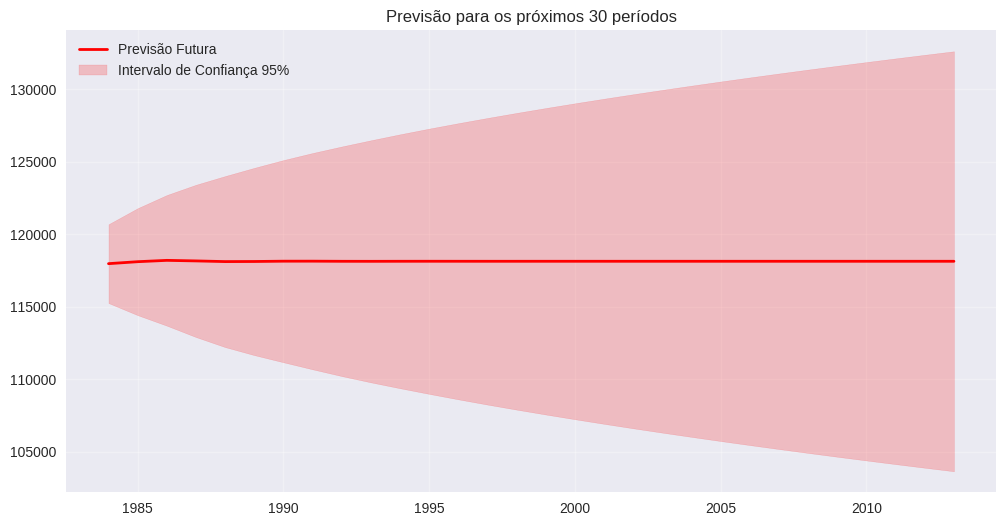


Previsões futuras (primeiros 10 valores):
1984    117980.127372
1985    118115.590379
1986    118208.048006
1987    118169.478228
1988    118122.764325
1989    118129.657553
1990    118150.734117
1991    118152.054458
1992    118143.433488
1993    118141.148080
Name: predicted_mean, dtype: float64


In [30]:
# Execução principal
if __name__ == "__main__":
    # Criar série temporal
    # serie =
    serie = dados['Ultimo']

    # Testar estacionariedade
    print("\n" + "="*50)
    print("TESTE DE ESTACIONARIEDADE")
    print("="*50)
    estacionaria = testar_estacionariedade(serie)

    # Se não for estacionária, aplicar diferenciação
    if not estacionaria:
        print("\nAplicando diferenciação para tornar a série estacionária...")
        serie_diff = serie.diff().dropna()
        estacionaria_diff = testar_estacionariedade(serie_diff)

    # Treinar modelo ARIMA
    print("\n" + "="*50)
    print("TREINAMENTO DO MODELO ARIMA")
    print("="*50)

    # Ordem do modelo: (p, d, q) = (AR, Integração, MA)
    modelo_ajustado, previsoes, train, test = modelo_arima_predicao(
        serie, ordem=(2, 1, 2), train_size=0.8
    )

    # Plotar resultados
    print("\n" + "="*50)
    print("VISUALIZAÇÃO DOS RESULTADOS")
    print("="*50)
    plotar_resultados(serie, train, test, previsoes)

    # Previsão futura
    print("\n" + "="*50)
    print("PREVISÃO FUTURA")
    print("="*50)
    previsoes_futuras = previsao_futura(modelo_ajustado, steps=30)

    print("\nPrevisões futuras (primeiros 10 valores):")
    print(previsoes_futuras.head(10))